# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [27]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [28]:
print(len(training_set))
print(training_set[0])

2035
[234.05]


In [29]:
print(training_set[:5])


[[234.05]
 [234.55]
 [240.  ]
 [233.3 ]
 [233.55]]


In [30]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[:5])

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 [0.61719384]
 [0.61820762]]


In [32]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1975, 60)
(1975,)


In [8]:
print(X_train[0])
print(y_train[0])

[0.6202352  0.62226277 0.64436334 0.61719384 0.61820762 0.62408759
 0.62793998 0.63584753 0.61658556 0.57725061 0.54845904 0.57339822
 0.57339822 0.56731549 0.57948094 0.57137064 0.63706407 0.62814274
 0.63219789 0.62550689 0.61942417 0.63219789 0.61111111 0.62206002
 0.64557989 0.67234388 0.66058394 0.64760746 0.6283455  0.62408759
 0.61597729 0.63341444 0.63077859 0.63321168 0.64841849 0.62469586
 0.62814274 0.61394972 0.67964315 0.65815085 0.6593674  0.64841849
 0.62773723 0.67883212 0.66058394 0.63990268 0.60888078 0.6431468
 0.6784266  0.65064882 0.71695053 0.74574209 0.7676399  0.78548256
 0.78994323 0.75892133 0.76520681 0.79622871 0.81062449 0.74371452]
0.7700729927007299


In [33]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1975, 60, 1)


In [2]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5])
c = np.concatenate([a, b])
print(c)

[1 2 3 4 5]


In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN 
from tensorflow.keras.layers import Dropout

In [65]:
# Initialising the RNN
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, return_sequences = True, 
                        input_shape = (X_train.shape[1], 1)))

regressor.add(SimpleRNN(units = 50, return_sequences = False))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)



Epoch 1/5
62/62 [==============================] - 2s 17ms/step - loss: 0.0153
Epoch 2/5
62/62 [==============================] - 1s 18ms/step - loss: 6.2742e-04
Epoch 3/5
62/62 [==============================] - 1s 16ms/step - loss: 5.8115e-04
Epoch 4/5
62/62 [==============================] - 1s 18ms/step - loss: 5.0643e-04
Epoch 5/5
62/62 [==============================] - 1s 18ms/step - loss: 4.7043e-04


In [66]:
regressor.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 60, 50)            2600      
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price.shape)
print(real_stock_price.T)

(16, 1)
[[220.1  221.1  229.45 230.3  237.7  237.1  229.7  226.25 215.   215.
  215.5  208.   217.   223.5  230.   234.55]]


In [71]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((
    dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - 
                       len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)
print(predicted_stock_price.T)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.T)


(16, 60)
(16, 60, 1)
1/1 [==============================] - 0s 24ms/step
(16, 1)
[[0.1574596  0.2692732  0.29152316 0.46954727 0.46209946 0.5563726
  0.66374755 0.63559926 0.6640256  0.6295948  0.5894231  0.5424029
  0.54912925 0.56299454 0.5460258  0.54155004]]
[[119.929535 147.50276  152.98961  196.89037  195.05373  218.30148
  244.78015  237.83878  244.84872  236.35808  226.45175  214.85657
  216.51527  219.93446  215.74997  214.64624 ]]


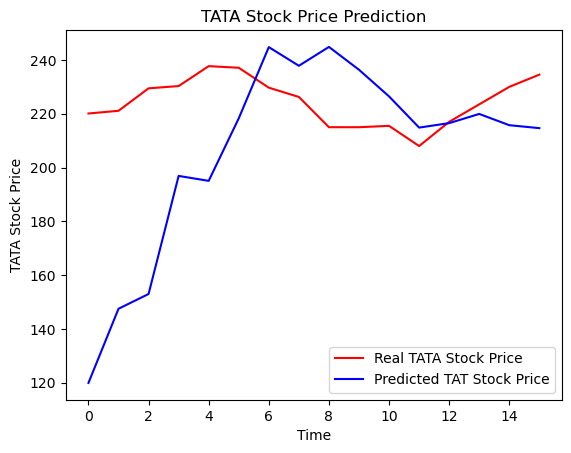

In [72]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 
         'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()